# Solución de ecuaciones
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>
<style type="text/css">
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>

## Raíces de ecuaciones 
Las raíces o ceros de una función continua, son los valores de x tal que $f(x) = 0$; lo que es equivalente a resolver ecuaciones del tipo $g(x)=h(x)$, ya que esta ecuación puede reescribirse como $f(x)=h(x)-g(x)=0$. Los métodos numéricos de búsqueda de raíces son algoritmos que iteran sobre una solución aproximada, produciendo una secuencia de números que, con suerte, convergen hacia la raíz como límite.

## Agenda
1. Tipos de ecuaciones
1. Linealidad
1. Puntos periódicos
1. Solución de ecuaciones no lineales

In [1]:
# Importar módulos al cuaderno de jupyter
import math as m 
import numpy as np
import pylab as plt

## 1. Tipos de Ecuaciones
---
En matemáticas una ecuación es una igualdad entre dos expresiones, separadas por el signo igual; tal que en las expresiones miembro aparecen variables independientes relacionadas mediante operaciones matemáticas.

\begin{align}
\tag{1} f(x_1, x_2, ... , x_n) &= g(x_1, x_2, ... , x_n) \\
\tag{2} f(x_1, x_2, ... , x_n) &= 0 \\
\end{align}

### a. Ecuaciones de una variable
Una simplificación de $(2)$ sucede cuando solo existe una variable independiente y la ecuación se puede reescribir como:

\begin{align}
\tag{3} f(x) & = 0 \\
\end{align}

### b. Ecuaciones algebraicas o polinómicas
Una simplificación adicional de de $(2)$ sucede cuando sus miembros incluyen unicamente sumas y multiplicaciones de la variable independiente; en cuyo caso la expresión se conoce como polinomio y se puede reescribir como la suma de <code>n+1</code> monomios cuyos coeficientes o parámetros $a_0, a_1, a_2, ... , a_n$ son constantes en el dominio de los reales:

\begin{align}
\tag{4} f(x) &= 0 \\
\tag{5} f(x) &= \sum_{1}^n a_i x^i \\
\tag{6} a_0 + a_1 x + a_2 x^2 + ... + a_n x^n & = 0, \quad a_n \neq 0 \\

\end{align}

> **NOTA:** El número n se denomina grado de la ecuación y es igual al numero raíces o ceros que son solución de la igualdad; estas soluciones pertenecen al dominio de los complejos y pueden ser reales o imaginarias; en el caso de soluciones imaginarias se dan en parejas de complejos conjugados.

### c. Ecuaciones trascendentes
Si la ecuación no puede expresarse o reducirse a un polinomio como las ecuaciones algebraicas se denominan ecuaciones trascendentes y su resolución va más allá del álgebra (trascienden el álgebra); las ecuaciones trascendentes más simples son las trigonométricas, logarítmicas y exponenciales sencillas.

> **NOTA:** La solución para x de estas ecuaciones puede no ser trivial y suelen ser objeto de estudio de los métodos numéricos.


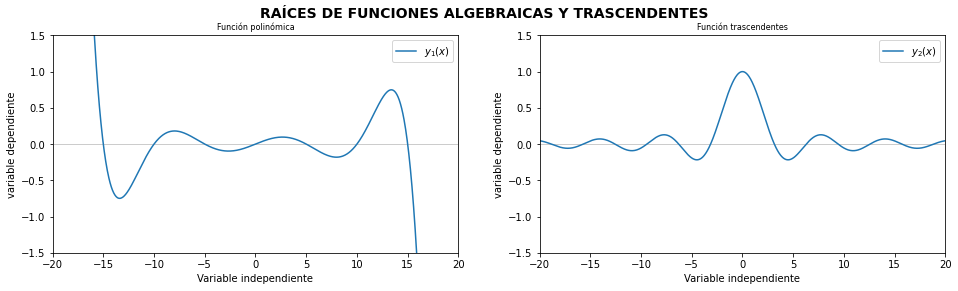

In [2]:
x = np.linspace(-20, 20, 1024, endpoint=True)
y1 = (-1/1e7)*(x**7 - 350*x**5 + 30_625*x**3 - 562_500*x)
y2 = np.sin(x)/x

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 4)
fig.suptitle('Raíces de funciones algebraicas y trascendentes'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].plot(x, y1, label="$y_1(x)$")

ax[0].set_xlim(-20, 20)
ax[0].set_ylim(-1.5, 1.5)

ax[0].set_title("Función polinómica", fontsize=8)
ax[0].set_xlabel("Variable independiente")
ax[0].set_ylabel("variable dependiente")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[1].plot(x, y2, label="$y_2(x)$")

ax[1].set_xlim(-20, 20)
ax[1].set_ylim(-1.5, 1.5)

ax[1].set_title("Función trascendentes", fontsize=8)
ax[1].set_xlabel("Variable independiente")
ax[1].set_ylabel("variable dependiente")
ax[1].legend()

plt.show()

## 2. Linealidad
---
### a. Ecuaciones lineales
Un caso particular de las ecuaciones algebraicas sucede cuando solo los dos primeros coeficientes son distintos de cero y la solución para x es única y trivial.

\begin{align}
\tag{7} a_0 + a_1 x & = 0, \quad a_1 \neq 0 \\
\tag{8} x & = \frac{-a_0}{a_1} \\
\end{align}

### b. Ecuaciones cuadráticas
Un caso particular de las ecuaciones algebraicas sucede cuando solo los tres primeros coeficientes son distintos de cero y las 2 soluciones para x es un par de complejos conjugados.

\begin{align}
\tag{9} a_0 + a_1 x + a_2 x^2 & = 0, \quad a_1 \neq 0 \\
\tag{10} x_1, x_2 & = \frac{-a_1 \pm \sqrt{a_1^2 - 4 a_2 a_0 }}{2 a_2} \\
\end{align}

### b. Ecuaciones de orden superior
Cuando más de tres coeficientes son distintos de cero en las ecuaciones algebraicas sucede que el número de soluciones es proporcional al orden de la ecuación; aunque la solución algebraica es posible debido a que existen métodos matemáticos para acotar la solución.

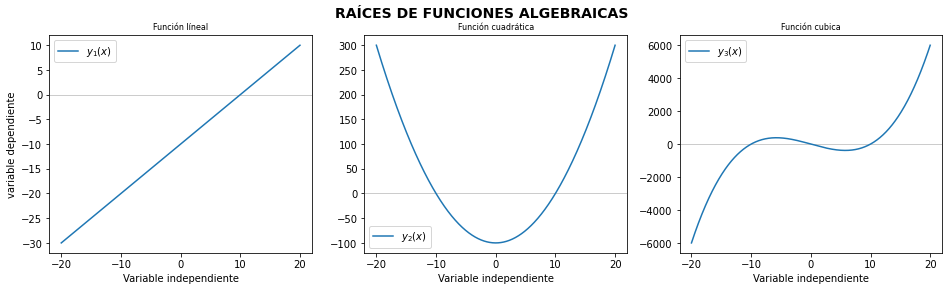

In [3]:
y3 = (x - 10)
y4 = (x - 10) * (x + 10)
y5 = (x + 10) * (x - 10) * x 

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.suptitle('Raíces de funciones algebraicas'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].plot(x, y3, label="$y_1(x)$")
ax[0].set_title("Función líneal", fontsize=8)
ax[0].set_xlabel("Variable independiente")
ax[0].set_ylabel("variable dependiente")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[1].plot(x, y4, label="$y_2(x)$")
ax[1].set_title("Función cuadrática", fontsize=8)
ax[1].set_xlabel("Variable independiente")
ax[1].legend()

# Gráficas 3
ax[2].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[2].plot(x, y5, label="$y_3(x)$")
ax[2].set_title("Función cubica", fontsize=8)
ax[2].set_xlabel("Variable independiente")
ax[2].legend()

plt.show()

## 3. Puntos periódicos
---
En el estudio de sistemas dinámicos, un punto periódico de una función iterada es el punto al cual el sistema retorna luego de un cierto número de iteraciones, al cabo de un cierto tiempo.

En matemáticas, los puntos periódicos vuelven al mismo valor después de un número finito de iteraciones de la función y un caso particular de ellos son los puntos fijos, donde el periodo <code>$T=1$</code>.

\begin{align}
\tag{11} (f:x \to x) \wedge (\text{$p$, es periódico}) \Rightarrow \exists \ n : f_n(p)=p\\
\end{align}

### a. Punto fijo
En matemáticas, un punto fijo de una función real es un punto cuya imagen producida por la función es él mismo; esto que significa que si <code>$p$</code> es un número real, <code>$p$</code> es un punto fijo de la función <code>$f(x)$</code> si y sólo si <code>$p = f(p)$</code>.

<p align="center">
  <img height="200" src="img/Fixed_Point_Graph.png">
</p>

> **NOTA:** En la gráfica (p, f(p)) pertenece a la recta $y=x$

<code>Ejemplo: </code> Un punto fijo de una función $f(x) = x^2$ es un número real p tal que $p = p^2$; entonces 0 y 1 son los puntos fijos de $f(x)$, porque $f(0) = 0$ y $f(1) = 1$.

## 4. Solución de ecuaciones no lineales
---
Solucionar una ecuación es encontrar las raíces o ceros de una ecuación y aunque en algunos casos los métodos analíticos o exactos son posibles y sencillos; en otros casos es necesario recurrir a métodos numéricos.

### a. Métodos Numéricos 
Los métodos de punto fijo y el de bisección son los primeros métodos numéricos que se utilizaron para resolver ecuaciones algebraicas y trascendentes; estos representan el punto de partida para otros métodos más eficientes; del método del punto fijo se derivan los métodos abiertos que se aproximan a la solución mediante una función auxiliar y del método de la bisección derivan los métodos cerrados que se aproximan a la solución reduciendo intervalos.

### b. Selección de un método numérico
Para seleccionar un método numérico que nos permita encontrar las raíces de una ecuación por aproximaciones sucesivas se requiere conocer información preliminar como:

* Tipo de ecuación.
* Número y tipo de las posibles raíces de la ecuación.
* Información del dominio, rango, continuidad, derivadas, intervalos de crecimiento.
* Ventajas y limitaciones que aporta cada algoritmo a la solución del problema.
* Semilla o valoración inicial de la solución.

### c. Consideraciones generales
Del [teorema del valor intermedio](https://es.wikipedia.org/wiki/Teorema_del_valor_intermedio) se tiene que si $f(x)$ es continua en un intervalo (a, b) y cambia de signo en ese intervalo existe al menos una raíz real de la ecuación asociada en ese intervalo; sin embargo, existen consideraciones particulares para cada uno de los tipos de ecuaciones estudiadas.

### d. Ecuaciones algebraicas
* El número de raíces es igual al grado del polinomio asociado; por lo tanto, en una ecuación de grado <code>n</code>, hay <code>n</code> raíces reales o complejas.
* Las raíces pueden ser reales o complejas conjugadas; por lo tanto, si el grado del polinomio es impar hay al menos una raíz real.
* La posible existencia de raíces múltiples complica el problema; pero si $f(x)$ es derivable en (a, b) y $f'(x)$ no cambia de signo en el ese intervalo, la raíz en ese intervalo es única.
* Existen métodos como la [regla de Descartes](https://es.wikipedia.org/wiki/Regla_de_los_signos_de_Descartes), el [teorema de Budan]() y [teorema de Sturm](https://es.wikipedia.org/wiki/Teorema_de_Sturm) que nos permiten acotar convenientemente las raíces del polinomio.

### e. Ecuaciones trascendentes
* Estas ecuaciones pueden tener cualquier número de posibles soluciones.
* Pueden tener ninguna, una o más raíces en un intervalo.
* Garantizar la existencia y unicidad de soluciones en estas ecuaciones es difícil de determinar y existe una mayor variedad de casos y comportamientos.
* Pueden tener múltiples raíces, donde tanto la función $f(x)$ como su derivada $f'(x)$ son iguales a cero.
* Algunas ecuaciones no pueden resolverse por métodos numéricos aún con un número muy grande de iteraciones.



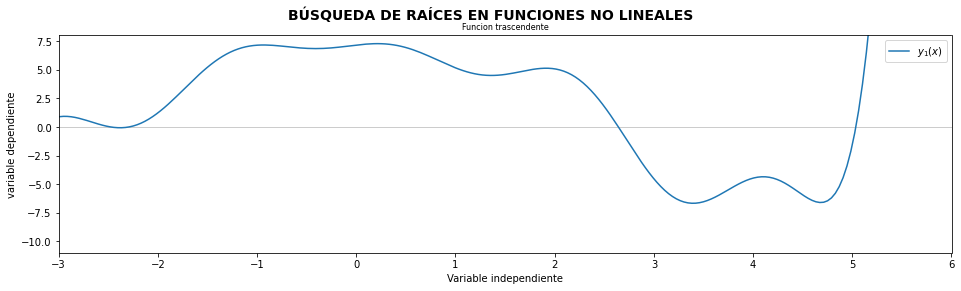

In [4]:
y6 = np.exp(3*x - 12) + x * np.cos(3*x) - x**2 + 7.15

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16, 4)
fig.suptitle('Búsqueda de raíces en funciones no lineales'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax.axhline(y = 0, linewidth=1.0, color="#ccc")
ax.plot(x, y6, label="$y_1(x)$")

ax.set_xlim(-3, 6)
ax.set_ylim(-11, 8)

ax.set_title("Función trascendente", fontsize=8)
ax.set_xlabel("Variable independiente")
ax.set_ylabel("variable dependiente")
ax.legend()

plt.show()

## Analizando la figura anterior se observa:
* La función $f$ asociada a la ecuación $f(x)=0$ es continua
* En el intervalo (-3, -2) visualmente no es posible determinar si la curva corta el eje $x$ una vez, dos veces o ninguna; con la posibilidad que un método iterativo pueda no detectar un intervalo válido, porque el signo $f(-3)$ es igual al signo de $f(-2)$.
* En cada uno de los intervalos (2, 3) y (5, 6) existe una raíz única y real.


---
## Mas Recursos

- [Ecuación](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n) (Wikipedia)
- [Ecuación algebraica](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_algebraica) (Wikipedia)
- [Polinomio](https://es.wikipedia.org/wiki/Polinomio) (Wikipedia)
- [Solución de Ecuaciones](https://es.wikipedia.org/wiki/Resoluci%C3%B3n_num%C3%A9rica_de_ecuaciones_no_lineales) (Wikipedia)
